#  Task 1 Assignment
>AUTHOR : Utshab Pyakurel\
>Prediction using the Supervised ML\
>Predicting the percentage of an student based on the no. of hours.

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [10]:
dataset = "http://bit.ly/w-data" #dataset
student_data = pd.read_csv(dataset)
print("Data imported successfully")

student_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


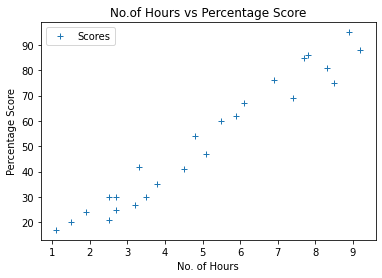

In [11]:
student_data.plot(x='Hours', y='Scores',style='+')  
plt.title('No.of Hours vs Percentage Score')  
plt.xlabel('No. of Hours')  
plt.ylabel('Percentage Score')  
plt.show()

### There exists  a positive linear relation between the no. of hours  and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


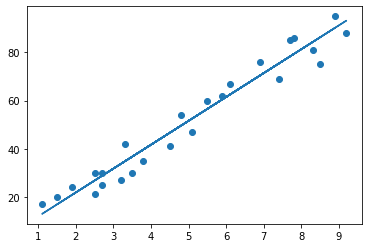

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
# You can also test with your own data
hours = np.array(8).reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No of Hours Studied = {}".format(hours))
print("Predicted PercentageScore = {:.3f} %".format(own_pred[0]))

No of Hours Studied = [[8]]
Predicted PercentageScore = 81.303 %


In [19]:
print('Mean Absolute Error:{:.3f}%'.format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error:4.184%
